In [25]:
import pandas as pd
from prophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [37]:
df = pd.read_csv('production_data.csv')

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values('Date')
# Assuming 'Date' is the name of your Datetime column
# Extract temporal features
df['month'] = df['Date'].dt.month
df['day_of_week'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
df['day_of_year'] = df['Date'].dt.dayofyear
df['is_weekend'] = df['Date'].dt.dayofweek > 5  # 1 if weekend, 0 otherwise
df['season'] = df['Date'].dt.month % 12 // 3 + 1  # Season from month

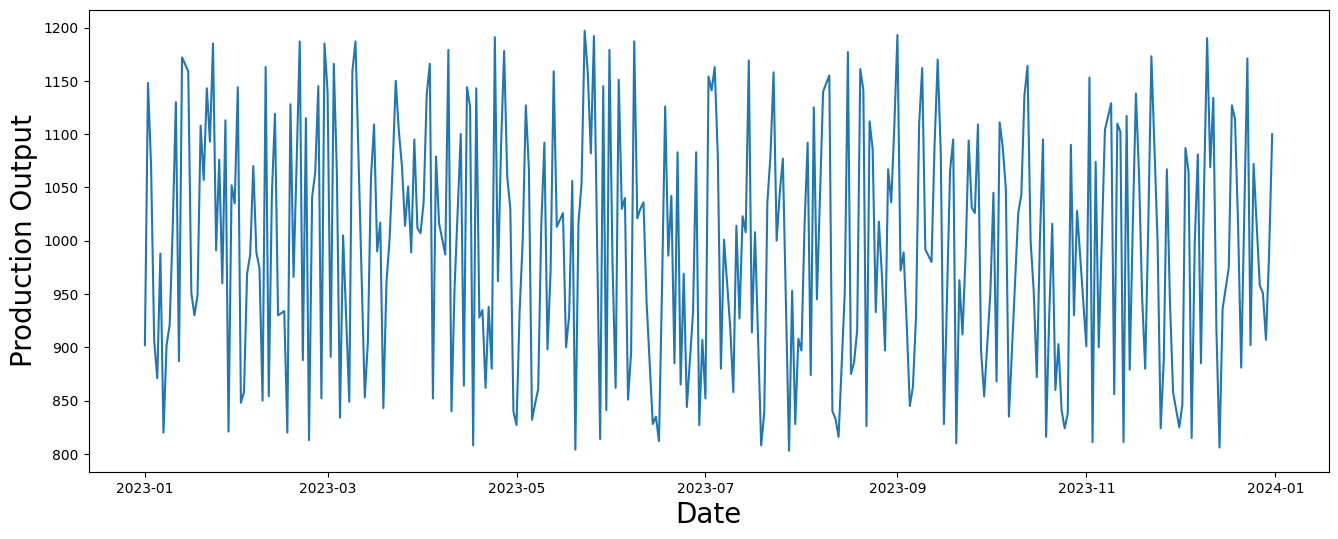

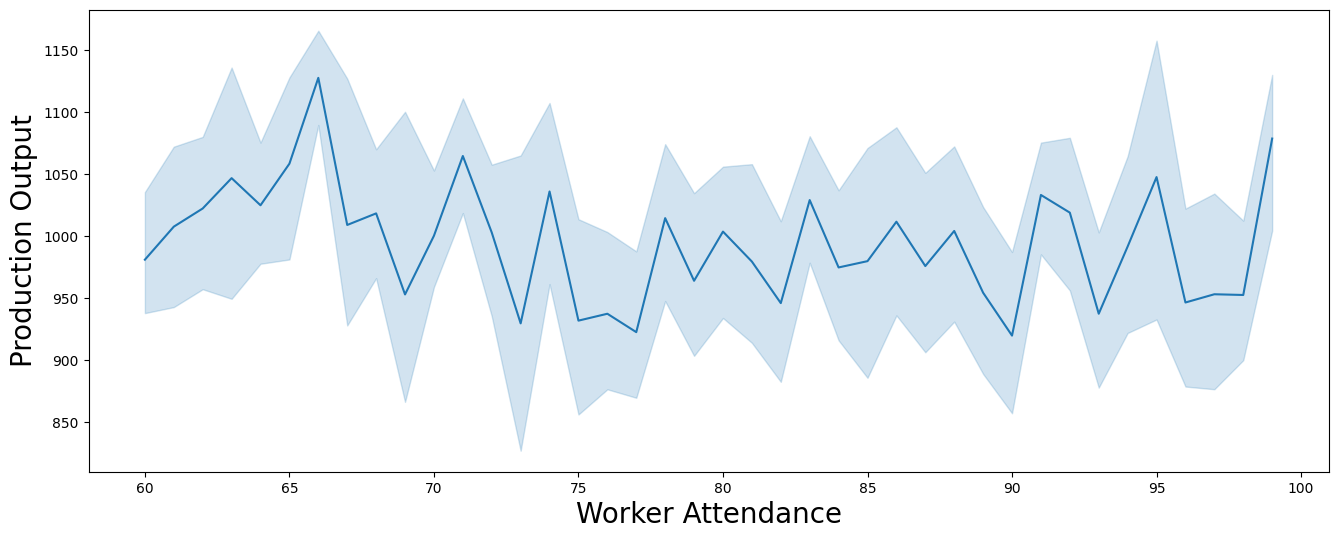

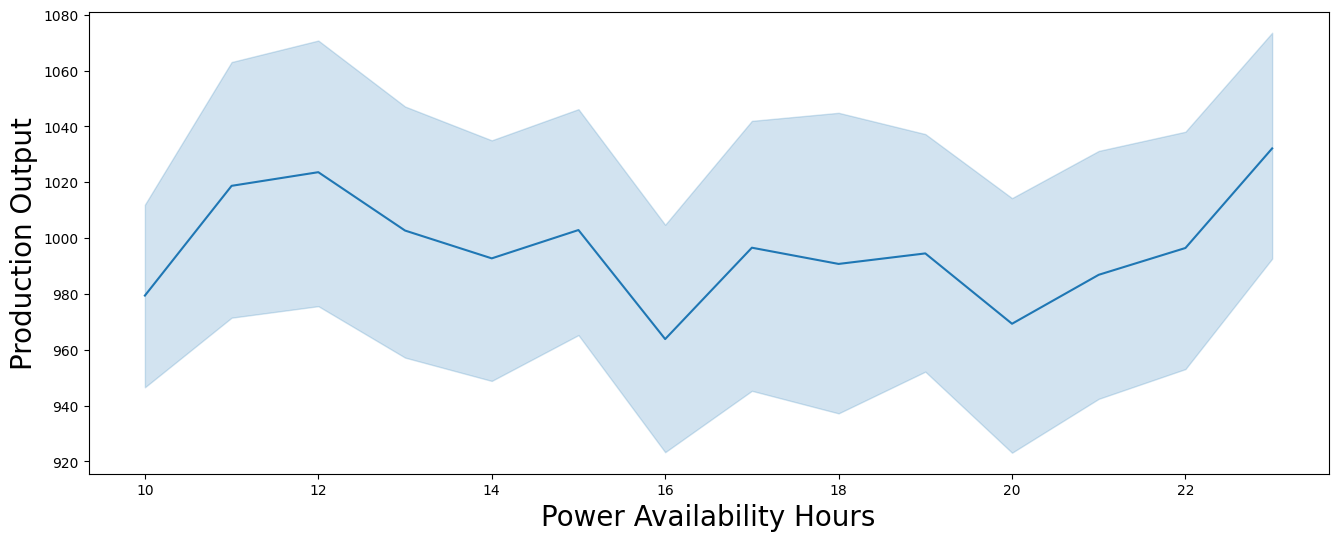

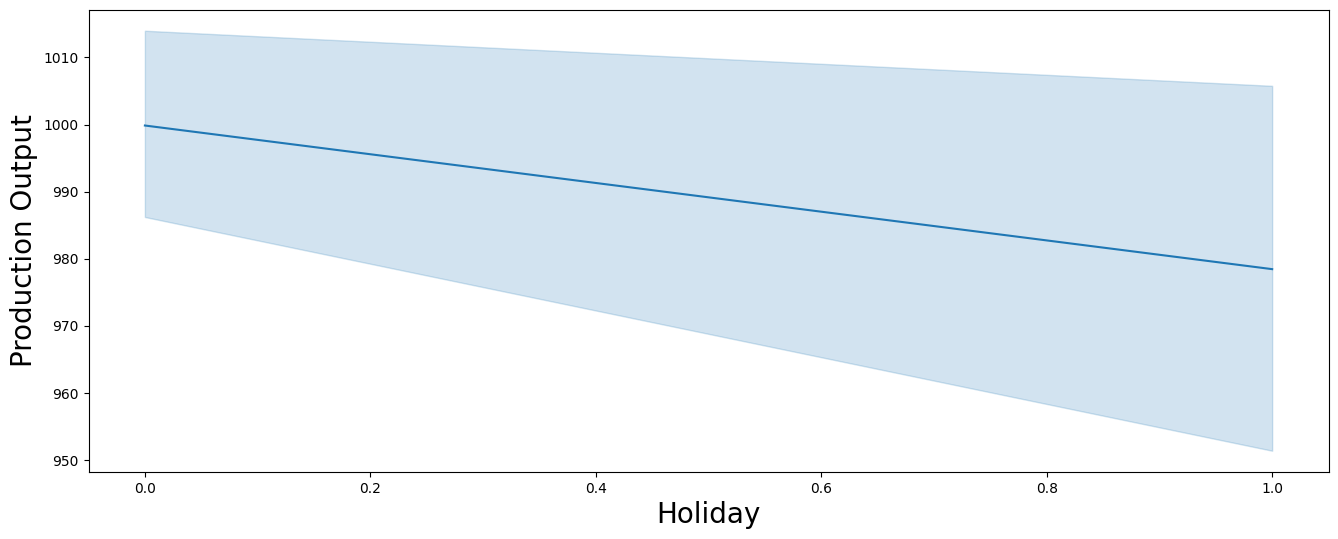

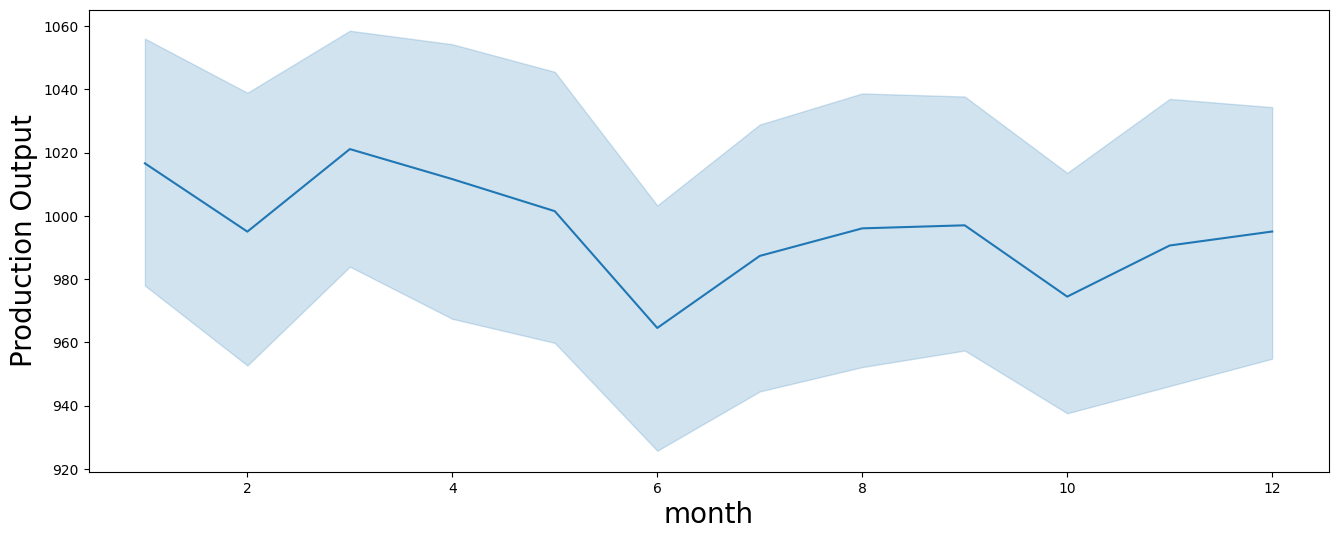

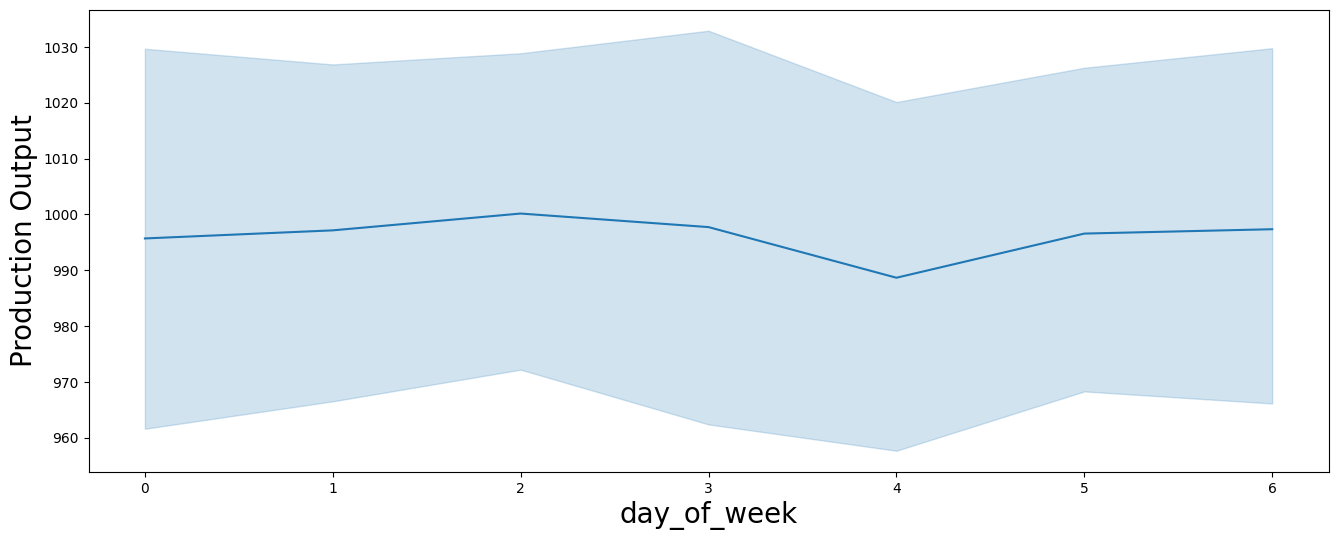

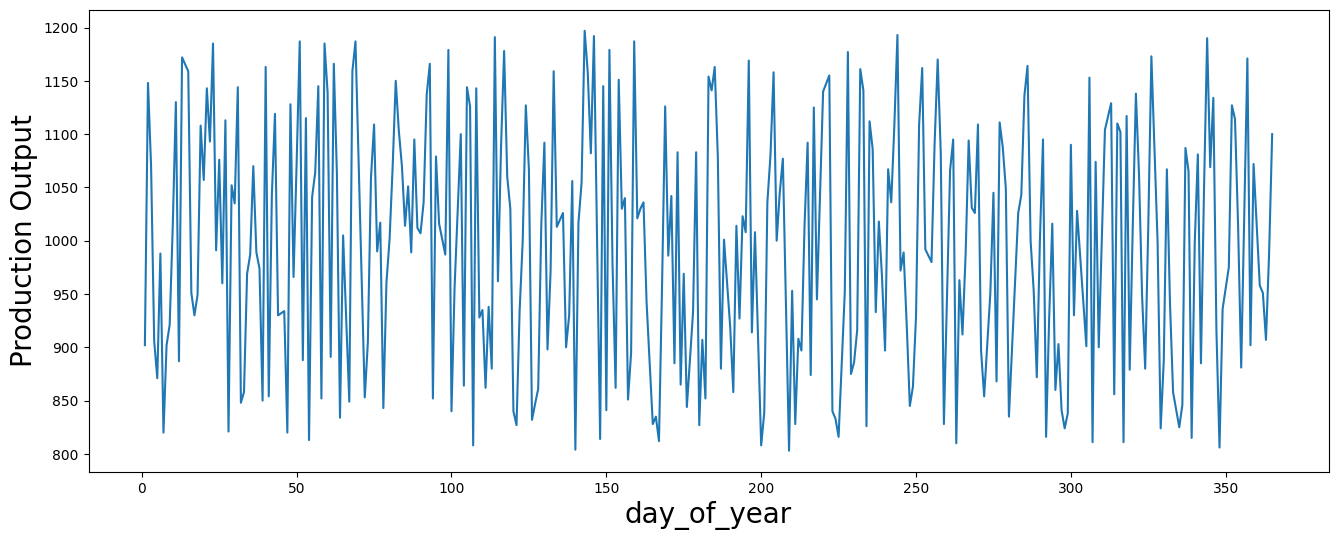

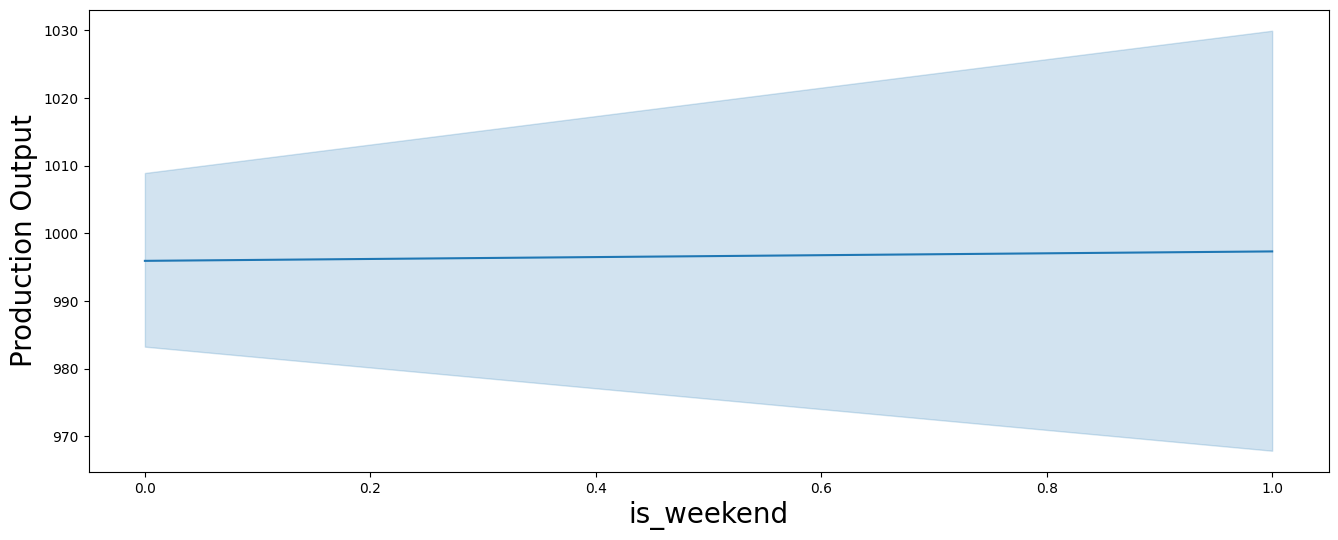

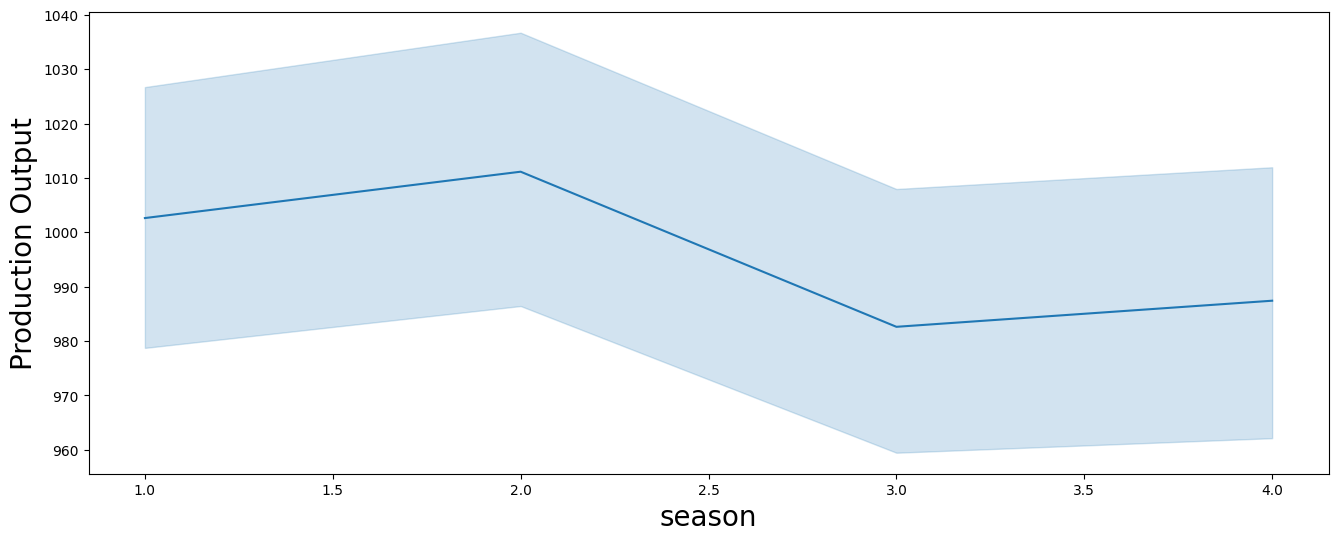

In [38]:
for column in df.columns:
    if column!= "Production Output":
        plt.figure(figsize=(16,6))
        ax = sns.lineplot(data=df,x=df[column], y=df['Production Output'])
        ax.set_xlabel(str(column), fontsize=20)
        ax.set_ylabel('Production Output', fontsize=20)
        plt.show()

<Axes: >

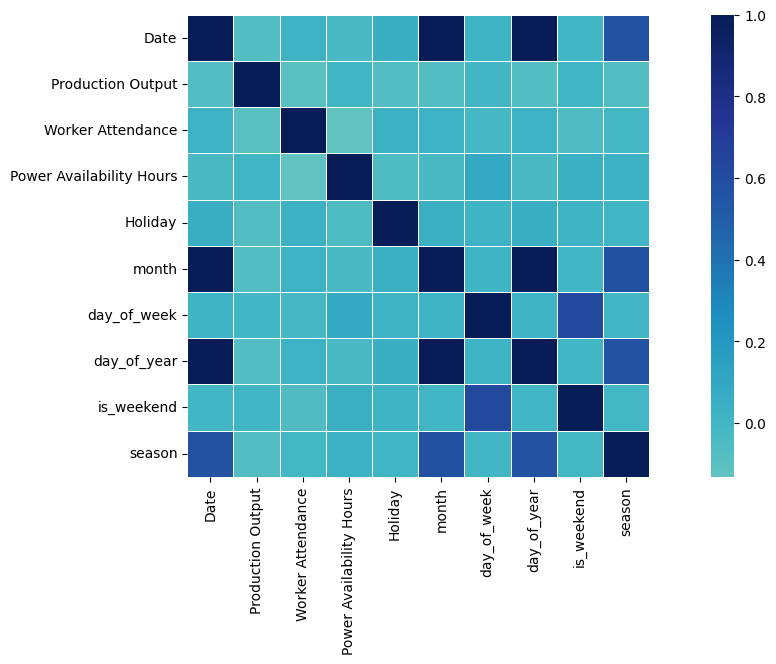

In [39]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(),cmap="YlGnBu",square=True,linewidths=.5,center=0)

In [42]:
df.isna().sum()

Date                         0
Production Output           29
Worker Attendance           29
Power Availability Hours    29
Holiday                      0
month                        0
day_of_week                  0
day_of_year                  0
is_weekend                   0
season                       0
dtype: int64

In [43]:
missing_features = ['Production Output', 'Worker Attendance', 'Power Availability Hours']
df[missing_features] = df[missing_features].fillna(method='ffill')

/tmp/ipykernel_149695/2304024888.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[missing_features] = df[missing_features].fillna(method='ffill')


In [44]:
df.isna().sum()

Date                        0
Production Output           0
Worker Attendance           0
Power Availability Hours    0
Holiday                     0
month                       0
day_of_week                 0
day_of_year                 0
is_weekend                  0
season                      0
dtype: int64

In [45]:
# Rename 'Date' to 'ds' and Production Output to y as required by Prophet

df['y'] = pd.to_numeric(df['Production Output'], errors='coerce')
df.rename(columns={'Date': 'ds'}, inplace=True)



In [46]:
# Initialize the Prophet model and add external regressors
model = Prophet()

# Add external regressors
model.add_regressor('Worker Attendance')
model.add_regressor('Power Availability Hours')
model.add_regressor('Holiday')

# Fit the model
model.fit(df)

17:40:48 - cmdstanpy - INFO - Chain [1] start processing
17:40:48 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
import pickle
with open('model.pkl', 'wb') as fout:
    pickle.dump(model, fout)
